In [4]:
from scipy.fft import dctn, idctn
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision.utils import save_image

In [5]:
img_input = Image.open("./srgan_img/input.png").convert("RGB")
img_gan = Image.open("./srgan_img/gan_output.png").convert("RGB")
img_bicubic = Image.open("./srgan_img/bicubic_output.png").convert("RGB")
img_pre = Image.open("./srgan_img/pre_output.png").convert("RGB")
img_hr = Image.open("./srgan_img/hr_target.png").convert("RGB")

In [38]:
def display_image(image, title=None, cmap='gray'):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=cmap)
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy.fft import fft2, fftshift
import cv2

def load_image(path, grayscale=True):
    img = Image.open(path)
    if grayscale:
        img = img.convert('L')  # Yチャンネル相当
    return np.array(img, dtype=np.float32)

def compute_fft_magnitude(img):
    fft_result = fftshift(fft2(img))
    magnitude = np.abs(fft_result)
    return np.log1p(magnitude)  # log(1 + |F|) for visualization

def radial_profile(data):
    # データ中心からの距離を求め、半径ごとに平均をとる
    y, x = np.indices((data.shape))
    center = np.array([x.shape[1]//2, y.shape[0]//2])
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int32)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radial_prof = tbin / np.maximum(nr, 1)
    return radial_prof


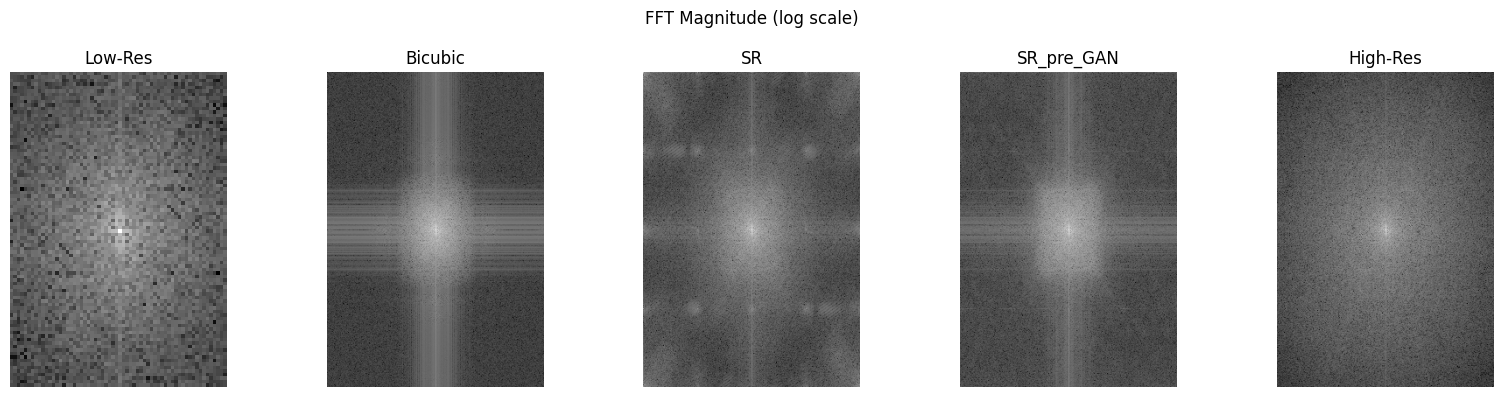

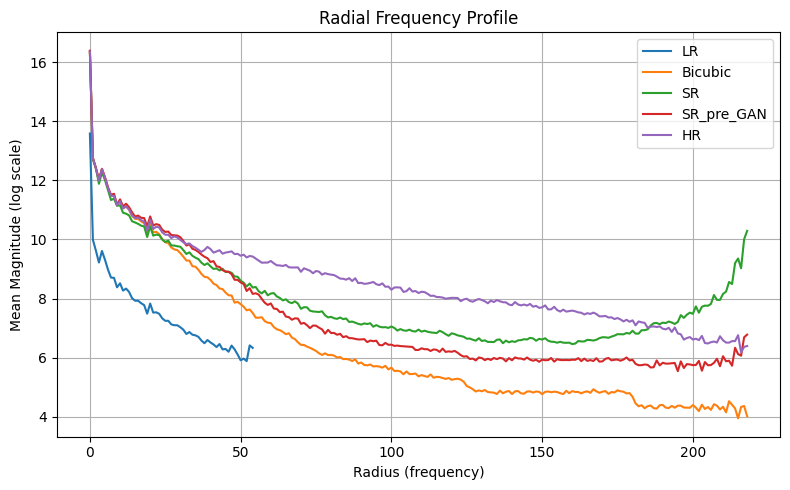

In [81]:
# 画像読み込み（例）
img_LR = load_image('./srgan_img/input.png')
img_BC = load_image('./srgan_img/bicubic_output.png')
img_SR = load_image('./srgan_img/gan_output.png')
img_SR_pre = load_image('./srgan_img/pre_output.png')
img_HR = load_image('./srgan_img/hr_target.png')

# img_LR = load_image('input.png')
# img_BC = load_image('bicubic_output.png')
# img_SR = load_image('gan_output.png')
# img_SR_pre = load_image('pre_output.png')
# img_HR = load_image('hr_target.png')

# FFT振幅スペクトル計算
fft_LR = compute_fft_magnitude(img_LR)
fft_BC = compute_fft_magnitude(img_BC)
fft_SR = compute_fft_magnitude(img_SR)
fft_SR_pre = compute_fft_magnitude(img_SR_pre)
fft_HR = compute_fft_magnitude(img_HR)

# ラジアルプロファイル取得
profile_LR = radial_profile(fft_LR)
profile_BC = radial_profile(fft_BC)
profile_SR = radial_profile(fft_SR)
profile_SR_pre = radial_profile(fft_SR_pre)
profile_HR = radial_profile(fft_HR)

# 可視化：2D FFT logスペクトル
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
for ax, fft_img, title in zip(
    axs,
    [fft_LR, fft_BC, fft_SR, fft_SR_pre, fft_HR],
    ['Low-Res', 'Bicubic', 'SR', 'SR_pre_GAN', 'High-Res']):
    ax.imshow(fft_img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.suptitle("FFT Magnitude (log scale)")
plt.tight_layout()
plt.show()

# 可視化：Radial Profile（1D）
plt.figure(figsize=(8, 5))
plt.plot(profile_LR, label='LR')
plt.plot(profile_BC, label='Bicubic')
plt.plot(profile_SR, label='SR')
plt.plot(profile_SR_pre, label='SR_pre_GAN')
plt.plot(profile_HR, label='HR')
plt.xlabel('Radius (frequency)')
plt.ylabel('Mean Magnitude (log scale)')
plt.legend()
plt.title('Radial Frequency Profile')
plt.grid(True)
plt.tight_layout()
plt.show()